<a href="https://colab.research.google.com/github/joaovicbrss/portfolio/blob/main/Analisando_os_Dados_do_Airbnb_da_Ilha_de_Malta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes ao arquipélogo de Malta, e ver quais insights podem ser extraídos a partir de dados brutos.**

#### Introdução
A República de Malta é um formada por ilhas que abrange um território terrestre de 316 Km². Localizada ao sul da ilha de Sicília (Itália) e o nordeste da Tunísia (África). Por sem um país histórico e com paisagens paradisíacas recebe muitos turistas, o que nos leva a analisar os número do Airbnb nessa região.

<center><img alt="Analisando Airbnb" width="100%" src="https://turistaprofissional.com/wp-content/uploads/2014/11/dicas-de-malta.jpg"></center>



## Obtenção dos Dados
Os dados dessa análise foram obtidos através do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html). Tem por objetivo prover dados sem custo que quantifica o impacto do aluguel de curto prazo na habitação e comunidade residenciais.

A análise exploratoria foi baseada do arquivo de 29 de abril de 2021:
* listings.csv - _Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing)._

O DataFrame(DF) é os dados estruturados em forma de tabela, com linha (entradas ou registros) e colunas (variáveis). Através da biblioteca Panda, que é amplamente utilizada na área de trabalho com dados, conseguimos transforma um simples arquivo .csv em DataFrame.  Utilizando esse formato, facilita a vizualização e o entendimento da base de dados.

In [35]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [45]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/malta/2021-04-29/visualisations/listings.csv')

## Análise dos Dados
Esta etapa tem como explorar e entender como os dados na base de dados estão dispostos. Sabendo o como os dados estão estruturados, podemos começar a extrair informações para tentar tira-las algum conhecimento.





**Dicionário das variáveis**

* `id` - *Número de identificação do imóvel*
* `name` - *Nome do imóvel*
* `host_id` - *Número de identificação do proprietário do imóvel*
* `host_name` - *Nome do proprietário do imóvel*
* `neighbourhood_group` -  *Coluna sem valores válidos*
* `neighbourhood` - *Nome do bairro*
* `latitude` - *Coordenada latitudinal do imóvel*
* `longitude` - *Coordenada longitudinal do imóvel*
* `room_type` - *Tipo de acomodação*
* `price` - *Preço para aluguel*
* `minimum_nights` - *Número mínimo de noites para aluguel*
* `number_of_reviews` - *Número de avalições da acomodação*
* `number_of_reviews_ltm` - *Número de avalições nos últimos 12 meses*
* `last_review` - *Data da última avaliação*
* `reviews_per_month` - *Número de avaliações por mês*
* `calculated_host_listings_count` - *Quantidade de imóveis do mesmo dono*
* `availability_365` - *Número de dias que a acomodação está disponivel durante 365 dias*


In [37]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,40176268,Ta Giza Apartments Flat 2,309568120,Gordon,NaN,Fontana,36.04116,14.23458,Entire home/apt,49,2,4,3,2020-12-28,0.28,2,211
1,21318601,Central townhouse: sleeps 8 ideal for carnival!!,77869472,Amelia,NaN,Fontana,36.03823,14.23743,Entire home/apt,260,3,1,0,2019-08-15,0.05,1,89
2,31882353,Private bedroom near Valletta & Private bathroom,43399245,Nicholas,NaN,Pieta,35.89281,14.49193,Private room,27,3,28,2,2020-09-04,1.08,3,105
3,43262791,Happy and Healthy Gozo /\n2 bdr. Apartment+Kit...,130713272,Julia,NaN,Fontana,36.03815,14.23797,Private room,120,2,0,0,NaN,NaN,2,349
4,34405736,Villa Ambrosia Gastro Bed and Breakfast,12418385,Christopher,NaN,Fontana,36.03962,14.23842,Private room,60,3,0,0,NaN,NaN,1,4


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Para avaliar começar a avaliar os o DataFrame, é preciso saber a quantidade de atributos e entradas o conjunto de dados possui. Neste conjuto, temos 17 variáveis ou colunas e 8475 entradas ou linhas. Sabendo a dimensão, precisamos saber qual o tipo de cada variável para saber como manipular o DataFrame.


In [38]:
# identificar o volume de dados do DataFrame
print(f'O DataFrame tem {df.shape[0]} entradas e {df.shape[1]} colunas!\n\n')

# verificar os tipos das variáveis
print(f'Os tipos das variáveis são: \n{df.dtypes}')


O DataFrame tem 8475 entradas e 17 colunas!


Os tipos das variáveis são: 
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
number_of_reviews_ltm               int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Seguindo na análise, é necessário saber a quantidade de valores ausêntes. Dependendo da porcentagem de dados nulos, é preciso tomar decisões de exclusão ou preenchimento de alguma forma. Normalmente ignorar dados não validos pode trazer problemas à análise.

In [39]:
# ordenar em ordem decrescente as variáveis por seus valores ausente
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.284012
last_review                       0.284012
host_name                         0.068437
name                              0.000118
availability_365                  0.000000
latitude                          0.000000
host_id                           0.000000
neighbourhood                     0.000000
room_type                         0.000000
longitude                         0.000000
calculated_host_listings_count    0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

A distribuição das variáveis pode ser verificada usando a ferramenta chamada histograma. Sabendo de como os dados estão distribuidos, pode-se identificar a existência de _outliers_.



---



_O que é um Histograma?_

_Histograma é uma ferramenta de vizualização de dados usada na análise exploratória para saber a frequência que os dados aparecem em determidada variável._





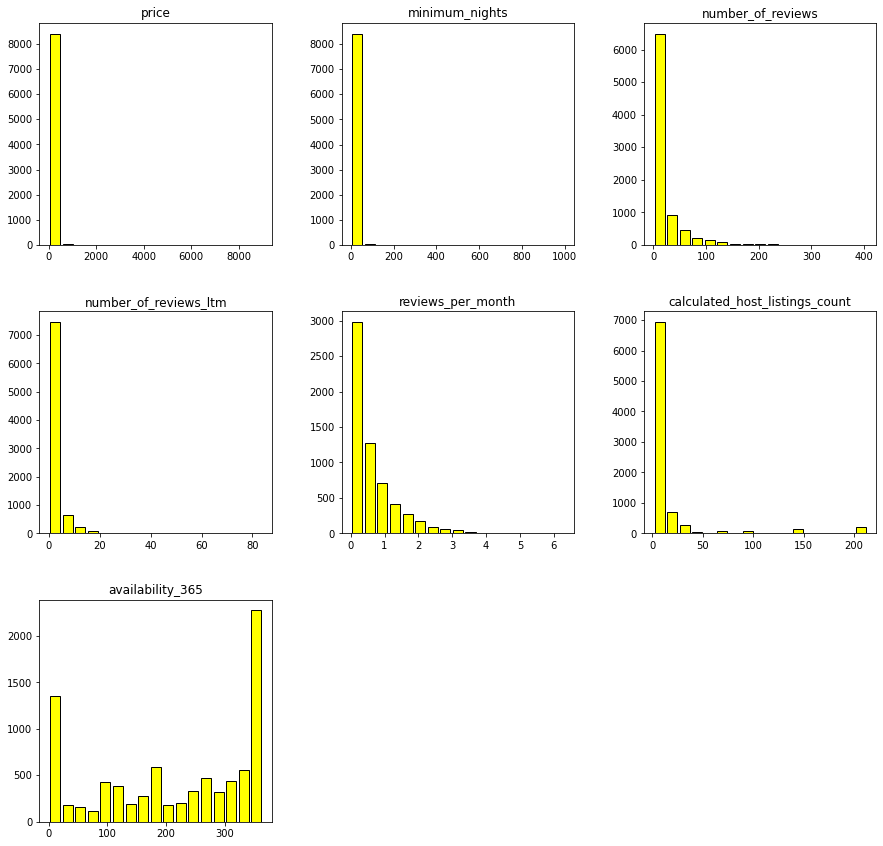

In [40]:
# plotar o histograma das variáveis numéricas
list_hist = ['price','minimum_nights','number_of_reviews','number_of_reviews_ltm','reviews_per_month','calculated_host_listings_count','availability_365']
df.hist(list_hist, bins=17, figsize=(15,20),color='yellow', layout=(4,3), grid=False, rwidth=0.8, edgecolor='black');

### **Q4. Qual a média dos preços de aluguel?**
Para uma aproximação de um valor mais próximo da realidade, é necessário fazer um filtro de alguns _outliers_ nesta coluna.

---

 _O que são outliers?_

_São valores que se destacam por estar fora do padrão e normalmente de forma isolada. Sabendo disto, podemos filtrar esses valores para que os resultados do estudo fique mais próximo dos valores reais._

---

Aplicando esta ideia, foi adotado que todos os valores acima de 500 da coluna price seriam considerados _outliers_, o que representa menos de 1% do DataFrame. Este procedimento trouxe um número mais  próximo da realidade sem qualquer prejuizo à análise.

In [46]:
# ver a média da coluna `price``
print('A porcentagem de imóveis com o preço acima de 500 euros é de {}%\n'.format(len(df[df.price > 500]) / df.shape[0]*100))
print('A porcentagem de imóveis com o mínimo de noites acima de 31 dias é de {}%\n'.format(len(df[df.minimum_nights > 31]) / df.shape[0]*100))

print( df.price.loc[df.price < 500].describe())

df_cleaned = df
df_cleaned.drop(df_cleaned[df_cleaned.price > 500].index, axis=0, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned.minimum_nights > 31].index, axis=0, inplace=True)



A porcentagem de imóveis com o preço acima de 500 euros é de 0.8141592920353982%

A porcentagem de imóveis com o mínimo de noites acima de 31 dias é de 0.7433628318584071%

count    8384.000000
mean       83.644323
std        68.528237
min         8.000000
25%        40.000000
50%        65.000000
75%       100.000000
max       490.000000
Name: price, dtype: float64


### **Q5. Qual a correlação existente entre as variáveis**
Através da correlação podemos verificar a intensidade da relação, que varia entre 1(correlação positiva), 0(correlação nula) e -1(correlação negativa), que existe entre um conjunto de variáveis do DataFrame. É importante lembrar que: correlação não implica casualidade.

In [27]:
# criar uma matriz de correlação
matriz_cor = df_cleaned[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação

display(matriz_cor)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.018777,-0.114235,-0.161887,0.167443,0.074498
minimum_nights,0.018777,1.000000,-0.053919,-0.113144,-0.006630,-0.007070
number_of_reviews,-0.114235,-0.053919,1.000000,0.821753,-0.132225,0.005057
reviews_per_month,-0.161887,-0.113144,0.821753,1.000000,-0.108048,-0.010901
calculated_host_listings_count,0.167443,-0.006630,-0.132225,-0.108048,1.000000,0.155685
availability_365,0.074498,-0.007070,0.005057,-0.010901,0.155685,1.000000


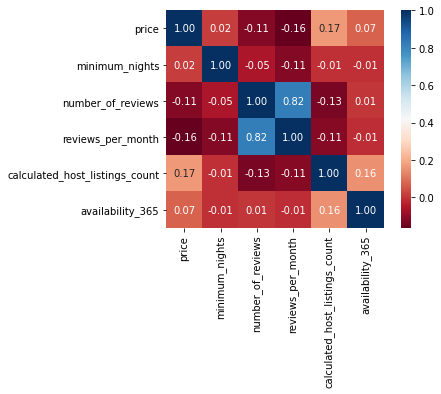

In [47]:
# plotar um heatmap a partir das correlações
sns.heatmap(matriz_cor, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

Segundo os dados de número de avaliações, o tipo de imóvel mais alugado é o modelo de imóvel completo. Esse valor pode ter influencia da grande quantidade de imóveis completos para aluguel na ilha de Malta.

In [50]:
# mostrar a quantidade de cada tipo de imóvel disponível
print(df_cleaned.room_type.value_counts())
print('\n\n\nDe acordo com número de avaliações, o tipo de imóvel mais alugado é o modelo do imóvel completo.\n',df_cleaned.groupby(['room_type']).number_of_reviews.mean().sort_values(ascending=False)[:10])

Entire home/apt    5084
Private room       2767
Shared room         332
Hotel room          163
Name: room_type, dtype: int64



De acordo com número de avaliações, o tipo de imóvel mais alugado é o modelo do imóvel completo.
 room_type
Entire home/apt    22.984854
Private room       13.742320
Hotel room          5.822086
Shared room         4.376506
Name: number_of_reviews, dtype: float64


In [49]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_cleaned.room_type.value_counts() / df_cleaned.shape[0]

Entire home/apt    0.609154
Private room       0.331536
Shared room        0.039780
Hotel room         0.019530
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**

Segundo os dados de preço, a localidade mais cara na ilha de malta é Għasri, que é o menor povoado da ilha de Gozo. Fica na parte oeste da ilha e tem uma área de aproximadamente 5km².



In [48]:
# ver preços por bairros, na média
df_cleaned.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Ghasri            162.759036
Luqa              154.833333
Zurrieq           154.400000
San Lawrenz       148.705882
Sannat            139.937500
Gharb             138.592593
Xaghra            136.401674
Dingli            132.500000
Zebbug (Malta)    132.200000
Kercem            131.316667
Name: price, dtype: float64

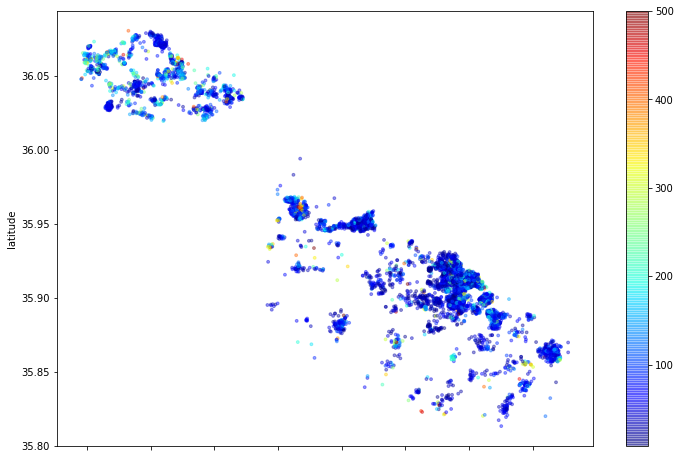

In [24]:
# plotar os imóveis pela latitude-longitude
df_cleaned.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

A média de noites mínimas para aluguel de imóvel na ilha de Malta é 3 noites. Uma hipótese pode ser que os proprietários de imóveis se baseiam em alugueis por finais de semanas completos.

In [51]:
# ver a média da coluna `minimum_nights``
print('A média de mínimo de noites para aluguel de imóveis em Malta é {:0.3} noites.' .format(df.minimum_nights.mean()))


A média de mínimo de noites para aluguel de imóveis em Malta é 3.01 noites.


## Conclusões

Finalizando a análise exploratória, pode-se notar que é possível coletar informações de grande valia para quem pretende viajar para Ilha de Malta, mesmo que usando um dataset resumido, principalmente para quem deseja visitar a ilha sem ter surpresas financeiras na parte de hospedagem. 
É importante ressaltar que para ter uma melhor precisão e análise mais apurada é necessário utilizar um dataset com mais variáveis. Gerando mais informações e respondendo mais perguntas com mais dados.



